# Forward scattering thin screen

M Kenworthy // Leiden Observatory // kenworthy@strw.leidenuinv.nl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy import units as u


## HG scattering

Defining the Henyey and Greenstein (1948) scattering function


In [2]:
@u.quantity_input
def hg(theta:u.rad, g=0.):
    top = 1 - g*g
    bot = np.power((1+g*g-(2*g*np.cos(theta))), 1.5)
    return top / (4*np.pi*u.sr * bot)

## check that HG produces reasonable functions

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  after removing the cwd from sys.path.


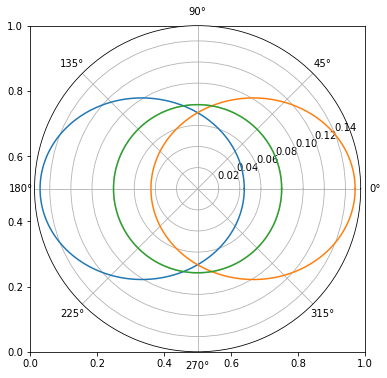

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
thet = np.linspace(0, 2*np.pi * u.rad, 500)

plt.polar(thet, hg(thet,-0.2))
plt.polar(thet, hg(thet,0.2))
plt.polar(thet, hg(thet,0.0))


total flux through 4pi steradian sphere is 1.00


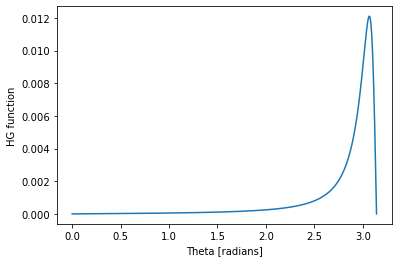

In [4]:
npoi = 1000
dthet = np.pi*u.rad/npoi

thet = np.linspace(0.000*u.rad, (3.14159) * u.rad, npoi)

# onion ring of solid angle! this has a perimeter of 2pi.sin(theta) and width dthet
# so we've taken the flux per steradian at angle theta, hg(theta)
# and multiplied it by the solid angle of the onion ring and 

onion_ring_solid_angle = (2*np.pi * u.rad * np.sin(thet) * dthet).to(u.sr) # onion ring is steradians
flux_of_onion_ring = onion_ring_solid_angle * hg(thet,-0.9) # steradians per onion ring * flux at theta per steradian
plt.plot(thet, flux_of_onion_ring)

# adding up all the onion rings makes one onion!
print("total flux through 4pi steradian sphere is {:.2f}".format(np.sum(flux_of_onion_ring)))
plt.xlabel('Theta [radians]');
plt.ylabel('HG function');


In [93]:

class Motes:
    def __init__(self):
        self.x = ()
        self.y = ()
        self.tau = ()
        self.area = ()
        self.dx = ()
        self.dy = ()

# grid for the star and grid for the scatterer


# star is at 0,0 
# distances are in Quantities

# need .x and .y and .A and .tau NO SANITY CHECK IF NOT SQUARE
# return numpy arrays

@u.quantity_input
def make_disk(r:u.m, dx:u.m, dy:u.m, tau=0.1):
    'return a circular disk of radius r with points and area per point on a rectilinear grid'
    # guess how many pixels needed
    # disk is centered on (0,0)
    pix_x = np.ceil(r/dx)
    pix_y = np.ceil(r/dy)

    x = np.arange(-pix_x, pix_x+1) * dx
    y = np.arange(-pix_y, pix_y+1) * dy
 
    xx, yy = np.meshgrid(x, y)
    rr = np.sqrt(xx*xx+yy*yy)
    m = (rr<=r)

    disk = Motes()
    
    disk.x = xx[m]
    disk.y = yy[m]
    nn = np.sum(m)
    disk.tau = np.ones(nn) * tau
    ########
    disk.tau = np.random.random(nn)
    ########
    
    disk.area = np.ones(nn) * dx * dy
    disk.dx = dx
    disk.dy = dy
    return disk



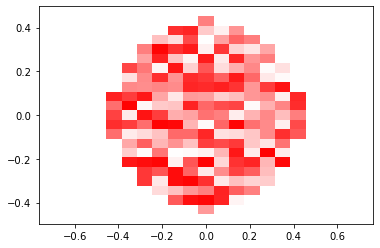

In [94]:

def plot_disk(d):
    # get plotting limits
    #
    fig, ax = plt.subplots()
    from matplotlib.patches import Rectangle
    
    xlow = (d.x - (d.dx/2.)).value
    ylow = (d.y - (d.dy/2.)).value
    
    for (xl,yl,ta) in zip(xlow,ylow, d.tau):
        pat = Rectangle([xl, yl], d.dx.value, d.dy.value, fc='red',alpha=ta)
        ax.add_patch(pat)
        ax.axis('equal')
    
    
di = make_disk(0.43*u.R_jup, 0.07*u.R_jup, 0.043*u.R_jup)
plot_disk(di)